# General overview on data and structure

Overview on the data set. Structural flaws will be tried to cured, however outliers and such will only be identified and not yet deleted as the relevant rows might be needed for feature engineering.

General comment:

If the number of rows to be dropped due to inconsistencies or NaN values is relatively small in comparison to the overall dataset than the rows will be rather dropped and no other means will be taken e.g. imputation.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import random

In [2]:
# Adjust settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline

In [3]:
# Load preprocessed dataset
data_path = '../data/interim/'
df = pd.read_pickle(os.path.join(data_path, 'preprocessed.pkl'))

In [4]:
# Initial look on pre-processed data set
print(df.shape)
df.head()

(12030, 33)


,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,gnd_catering_dur,gnd_clean_dur,gnd_board_dur,block_delay
0,272005011,East Carmen Airlines,EC3098,North Gregory,East Carmen,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0.0,0.0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0,2019-06-01 00:40:00,2019-06-01 04:30:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-18.0
1,272009188,East Carmen Airlines,EC3146,Port Bobby,East Carmen,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0.0,0.0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0,2019-06-01 02:05:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-20.0
2,271984537,East Carmen Airlines,EC2840,Port Ryan,East Carmen,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0.0,0.0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0,2019-06-01 02:20:00,2019-06-01 03:50:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7.0
3,272025831,East Carmen Airlines,EC3306,Coleland,East Carmen,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0.0,0.0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0,2019-06-01 02:25:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-11.0
4,272006092,East Carmen Airlines,EC3114,East Melissaberg,East Carmen,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0.0,0.0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0,2019-06-01 02:30:00,2019-06-01 04:15:00,DH4,ECLGNX,NaN,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,272006092.0,NaN,NaN,NaN,NaN,28.0


In [5]:
# Indicate share and total number of missing data per variable
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(28)


,Total,Percent
gnd_clean_dur,12027,0.999751
gnd_board_dur,8299,0.689859
gnd_catering_dur,7908,0.657357
gnd_sched_tat,7908,0.657357
gnd_mingt,7908,0.657357
gnd_arr_airpt,3764,0.312884
gnd_leg,3763,0.312801
gnd_sched_arr,3763,0.312801
gnd_sched_dep,3763,0.312801
gnd_dep_airpt,3763,0.312801


In [6]:
print(df.shape)
# Drop all columns with more than 50% missing values
df.drop(['gnd_mingt', 'gnd_sched_tat', 'gnd_catering_dur', 'gnd_clean_dur', 'gnd_board_dur'], axis=1, inplace=True)
# Drop rows with missing dependent variable
df.dropna(subset=['block_delay', 'ground_delay'], inplace=True)
# Drop additional duplicates if there are new ones due to dropped columns
df.drop_duplicates(inplace=True, ignore_index=True)
print(df.shape)

(12030, 33)
(11934, 28)


# Univariate data exploration
## Flight leg

In [7]:
# Explore flt_leg
df['flt_leg'].describe()

count         11934
unique        11896
top       272088104
freq              2
Name: flt_leg, dtype: int64

In [8]:
# Compare flt_leg and gnd_leg if available
df[df.gnd_leg.notna() & (df['flt_leg'].astype(object) != df['gnd_leg'].astype(object))]

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,block_delay


In [9]:
# Identify duplicates in flt_leg and drop them; drop gnd_leg as well as there is no additional information
print(df.shape)
dup_flt_leg = df[df.duplicated(['flt_leg'], keep=False)]
dup_flt_leg.to_csv('../data/interim/dup_flt_leg.csv')
df.drop_duplicates(subset='flt_leg', inplace=True, ignore_index=True)
df = df.drop(columns='gnd_leg')
print(df.shape)

(11934, 28)
(11896, 27)


## Carrier

In [10]:
# Explore flt_carrier
df['flt_carrier'].value_counts()

East Carmen Airlines    11896
Name: flt_carrier, dtype: int64

In [11]:
# Drop flt_carrier as there is no information in this column
df = df.drop(columns='flt_carrier')

## Flight number and routings

In [12]:
# Find all unique routings as combinations of fn_number, dep_ap_sched & arr_ap_sched
# Assumption that there is only one valid routing per fn_number 
routing = df[['flt_fnum', 'flt_dep_airpt', 'flt_arr_airpt']].value_counts().reset_index(name='count')
dup_fnnum = routing[routing.duplicated(['flt_fnum'], keep=False)]
print(dup_fnnum.sort_values(by='flt_fnum', ascending=True))

    flt_fnum     flt_dep_airpt       flt_arr_airpt  count
478  EC11525  East Allisontown           Aaronbury      5
479  EC11525         Aaronbury  North Stephenville      5
581  EC11859       East Carmen      New Stacyburgh      2
553  EC11859       East Carmen        East Michael      4
453  EC11860    New Stacyburgh         East Carmen      6
508  EC11860      East Michael      New Stacyburgh      5
562  EC11860    New Stacyburgh        East Michael      3
558  EC11860      East Michael         East Carmen      3
584  EC11869       East Carmen      South Victoria      1
607  EC11869       East Carmen           Jamesview      1
602   EC3027          West Ana         East Carmen      1
140   EC3027       East Carmen         Gilbertland     30
191   EC3117       East Carmen           Dudleyton     29
627   EC3117     Lake Joelbury         East Carmen      1
619   EC3292   South Nathaniel         East Carmen      1
220   EC3292       New Jessica         East Carmen     29
533   EC4498  

In [13]:
# Drop flt_fnum as all information is contained in the routing itself and flight number seem to be not consistent
df = df.drop(columns='flt_fnum')

## Departure airports

In [14]:
# Compare flt_dep_airpt and gnd_dep_airpt if available
df[df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,block_delay
4563,271986377,Kennethfort,East Carmen,2019-06-12 13:37:00,2019-06-12 15:16:00,ECLBRX,other problem,2.0,320,23.0,45.0,A,"['Paul Bryant_182_23_45_ca', 'Shannon Schmidt_...",[],460.0,479.0,2019-06-12 13:35:00,2019-06-12 15:35:00,320,ECLBRX,South Haileyberg,East Carmen,2019-06-12 13:35:00,2019-06-12 15:35:00,-19.0
4767,271994246,East Holly,East Carmen,2019-06-13 05:14:00,2019-06-13 06:14:00,ECLWMX,no reason,-11.0,E95,0.0,0.0,Start,"['Laura Marshall_nan_nan_nan_cp', 'Matthew Cur...",[],135.0,161.0,2019-06-13 05:25:00,2019-06-13 06:30:00,E95,ECLWMX,Paulbury,East Carmen,2019-06-13 05:25:00,2019-06-13 06:30:00,-16.0
7691,271968559,West Jason,East Carmen,2019-06-20 09:01:00,2019-06-20 10:13:00,ECLXDX,other problem,1.0,320,4.0,45.0,A,"['Lynn Murphy_88_4_45_cp', 'Linda Watts_88_4_4...",[],85.0,92.0,2019-06-20 09:00:00,2019-06-20 10:20:00,320,ECLXDX,Kennethfort,East Carmen,2019-06-20 09:00:00,2019-06-20 10:20:00,-7.0


In [15]:
# Delete rows with missmatching dep_airpt and drop gnd_dep_airpt as there is no additional information in comparison to flt_dep_arpt
print(df.shape)
dep_mismatch = df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]
dep_mismatch.to_csv('../data/interim/dep_mismatch.csv')
df = df.drop(df[df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))].index)
df = df.drop(columns='gnd_dep_airpt')
print(df.shape)

(11896, 25)
(11893, 24)


## Arrival airport

In [16]:
# Compare flt_arr_airpt and gnd_arr_airpt if available
arr_mismatch = df[df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))]
arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,block_delay
4287,271970762,East Carmen,West Jason,2019-06-11 19:13:00,2019-06-11 20:49:00,ECLBMX,other problem,13.0,320,28.0,50.0,A,"['Jackie Black_340_28_50_ca', 'Mark Anderson_3...","['ca', 'cp', 'cp', 'ca', 'ca']",NaN,NaN,2019-06-11 19:00:00,2019-06-11 20:20:00,320,ECLBMX,Susanmouth,2019-06-11 19:00:00,2019-06-11 20:20:00,29.0


In [17]:
# Delete rows with missmatching arr_airpt and drop gnd_arr_airpt as there is no additional information in comparison to flt_dep_arpt
print(df.shape)
arr_mismatch.to_csv('../data/interim/arr_mismatch.csv')
df = df.drop(df[df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))].index)
df = df.drop(columns='gnd_arr_airpt')
print(df.shape)

(11893, 24)
(11892, 23)


## Offblock

In [18]:
# Explore flt_offblock 
df['flt_offblock'].describe() 

count                   11892
unique                   9657
top       2019-06-25 08:35:00
freq                        6
first     2019-06-01 00:43:00
last      2019-06-30 23:19:00
Name: flt_offblock, dtype: object

## Onblock

In [19]:
# Explore flt_onblock 
df['flt_onblock'].describe()

count                   11892
unique                   9801
top       2019-06-28 09:52:00
freq                        5
first     2019-06-01 03:40:00
last      2019-07-01 04:01:00
Name: flt_onblock, dtype: object

## Aircraft registration

In [20]:
# Check mismatches in AC registration between flight data and ground data
ac_reg_mismatch = df[df.gnd_ac_reg.notna() & (df['flt_ac_reg'].astype(str) != df['gnd_ac_reg'].astype(str))]
ac_reg_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_sched_dep,gnd_sched_arr,block_delay


In [21]:
# Drop gnd_ac_reg as all information is already contained in flt_ac_reg
df = df.drop(columns='gnd_ac_reg')

## Flight change code

In [22]:
# Explore flt_change_code
df['flt_change_code'].value_counts(dropna=False)

other problem         7399
technical problem     2032
rotational problem    1595
no reason              866
Name: flt_change_code, dtype: int64

In [23]:
# Actually flt_change_code can be dropped as this variable will only be filled after the flight and therefore has no value in the prediction
df = df.drop(columns='flt_change_code')

## Ground delay

count    11892.000000
mean        25.865624
std         25.685488
min        -14.000000
25%         10.000000
50%         17.000000
75%         35.000000
max        476.000000
Name: ground_delay, dtype: float64


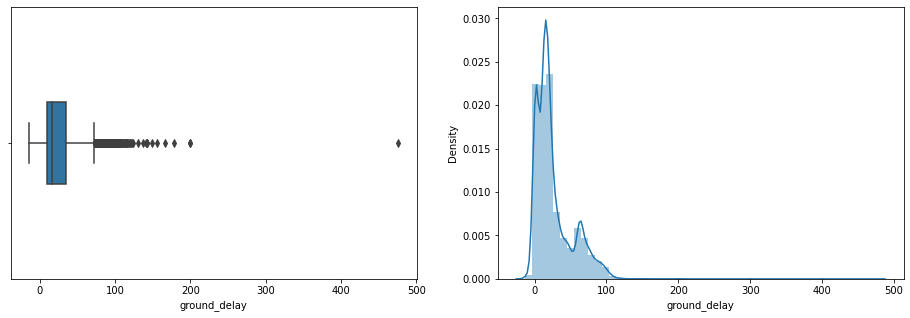

In [24]:
# Explore ground_delay
print(df['ground_delay'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['ground_delay'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['ground_delay'])
plt.show()

## Aircraft type

In [25]:
# Explore flt_ac_type
df.flt_ac_type.value_counts(dropna=False)

320    5990
E95    3230
DH4    2672
Name: flt_ac_type, dtype: int64

In [26]:
# Explore gnd_ac_type
df.gnd_ac_type.value_counts(dropna=False)

NaN    3657
320    2952
E95    2179
DH4    1165
319     860
DHX     434
321     329
322     316
Name: gnd_ac_type, dtype: int64

In [27]:
# Check mismatch in ac type between flight and ground data
pd.crosstab(df['flt_ac_type'], df['gnd_ac_type'])

gnd_ac_type,319,320,321,322,DH4,DHX,E95
flt_ac_type,,,,,,,
320,860,2952,329,316,0,0,0
DH4,0,0,0,0,1165,434,0
E95,0,0,0,0,0,0,2179


In [28]:
# Keep flt_ac_type and drop gnd_ac_type as there is more data in flt_ac_type and all values in gnd_ac_type
# are derivates of the ones in flt_ac_types. That means although flt_ac_type has less information than gnd_ac_type
# we keep it as it has a higher fillgrade.
df = df.drop(columns='gnd_ac_type')

## Actual Turnaround Time

count    11892.000000
mean        27.739657
std         31.888664
min       -134.000000
25%          0.000000
50%         28.000000
75%         49.000000
max        470.000000
Name: flt_tt, dtype: float64


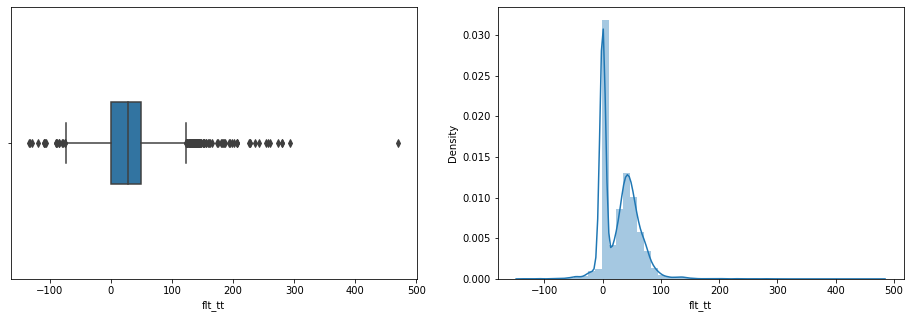

In [29]:
# Explore flt_tt
print(df['flt_tt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['flt_tt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['flt_tt'])
plt.show()

## Scheduled Turnaround Time

count    11892.000000
mean        34.958375
std         31.527233
min          0.000000
25%          0.000000
50%         45.000000
75%         50.000000
max        495.000000
Name: flt_sched_tt, dtype: float64


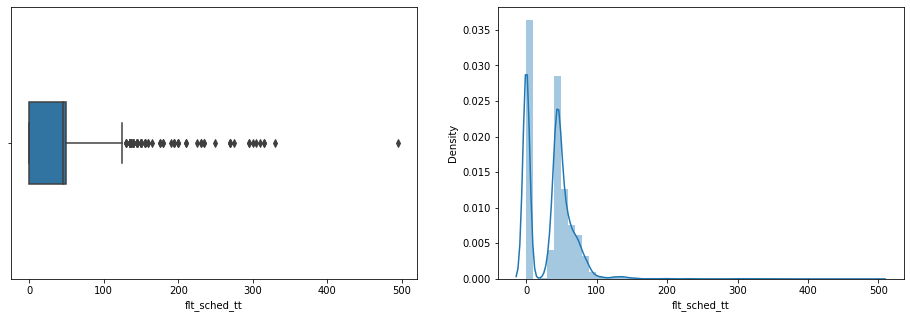

In [30]:
# Explore flt_sched_tt
print(df['flt_sched_tt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['flt_sched_tt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['flt_sched_tt'])
plt.show()

## Crew Group

In [31]:
# Explore flt_crewg
df.flt_crewg.value_counts(dropna=False)

A        5945
Start    4283
C         746
B         493
B2        425
Name: flt_crewg, dtype: int64

## Crew Transit

In [32]:
# Explore flt_TLC_trans
# Ensuring that nested lists are stored as such
df['flt_TLC_trans'] = df['flt_TLC_trans'].apply(eval)
df.flt_TLC_trans.describe()

count                                                 11892
unique                                                11824
top       [Zachary Coleman_64_43_45_ca, Tony Cobb_64_43_...
freq                                                      2
Name: flt_TLC_trans, dtype: object

## Crew Change

In [33]:
# Explore flt_crewt_change
df['flt_crewt_change'] = df['flt_crewt_change'].apply(eval)
df.flt_crewt_change.describe()

count     11892
unique       56
top          []
freq       9884
Name: flt_crewt_change, dtype: object

## Scheduled Groundtime

count    9901.000000
mean       62.862337
std        55.460179
min      -245.000000
25%        45.000000
50%        50.000000
75%        65.000000
max       945.000000
Name: flt_sched_gt, dtype: float64


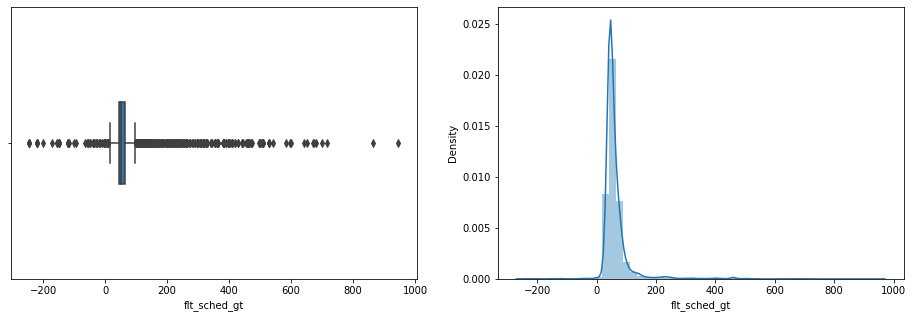

In [34]:
# Explore flt_sched_gt
print(df['flt_sched_gt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['flt_sched_gt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['flt_sched_gt'])
plt.show()

In [35]:
# How many cases have a negative scheduled groundtime?
df[(df['flt_sched_gt'] < 0)].shape

(51, 20)

### Looking at the negative values for flight groundtime

In [36]:
# Identifying a specific aircraft wherer flt_sched_gt < 0 to analyse why there is a negative schedulded gt for a specific date
condition = df['flt_sched_gt'] < 0
sample = df[condition].sample(n=3, random_state=42)

sample

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay
10439,272088110,New Stacyburgh,East Michael,2019-06-27 08:53:00,2019-06-27 09:59:00,ECLBKX,3.0,320,-49.0,45.0,A,"[Mary Jones_88_-49_45_ca, Justin Roth_88_-49_4...",[],-55.0,34.0,2019-06-27 08:50:00,2019-06-27 09:45:00,NaT,NaT,14.0
9985,272029888,East Carmen,Fisherhaven,2019-06-26 08:07:00,2019-06-26 09:13:00,ECLGMX,22.0,DH4,27.0,30.0,C,"[Mary Curtis_81_27_30_cp, William Harris_nan_n...",[cp],-10.0,-24.0,2019-06-26 07:45:00,2019-06-26 08:40:00,2019-06-26 07:45:00,2019-06-26 08:40:00,33.0
11423,272218014,East Allisontown,Aaronbury,2019-06-29 16:27:00,2019-06-29 17:07:00,ECLBJX,2.0,320,33.0,45.0,A,"[Erika Sandoval_232_33_45_cp, Julia Holloway_2...",[],-40.0,64.0,2019-06-29 16:25:00,2019-06-29 17:05:00,NaT,NaT,2.0


In [37]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBKX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-27')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay
10306,272002049,Ryanland,East Carmen,2019-06-27 04:02:00,2019-06-27 06:55:00,ECLBKX,17.0,320,0.0,0.0,Start,"[Holly Roberts_nan_nan_nan_cp, Mrs. Tabitha Jo...",[],-40.0,6.0,2019-06-27 03:45:00,2019-06-27 06:35:00,2019-06-27 03:45:00,2019-06-27 06:35:00,20.0
10360,272088025,East Carmen,New Stacyburgh,2019-06-27 07:01:00,2019-06-27 09:12:00,ECLBKX,66.0,320,0.0,0.0,Start,"[Andrew Smith_nan_nan_nan_ca, Jennifer Pitts M...",[],45.0,-19.0,2019-06-27 05:55:00,2019-06-27 08:05:00,2019-06-27 05:55:00,2019-06-27 08:05:00,67.0
10439,272088110,New Stacyburgh,East Michael,2019-06-27 08:53:00,2019-06-27 09:59:00,ECLBKX,3.0,320,-49.0,45.0,A,"[Mary Jones_88_-49_45_ca, Justin Roth_88_-49_4...",[],-55.0,34.0,2019-06-27 08:50:00,2019-06-27 09:45:00,NaT,NaT,14.0
10440,272088111,East Michael,East Carmen,2019-06-27 10:33:00,2019-06-27 12:26:00,ECLBKX,3.0,320,-49.0,45.0,A,"[Mary Jones_88_-49_45_ca, Justin Roth_88_-49_4...",[],-120.0,-101.0,2019-06-27 10:30:00,2019-06-27 12:30:00,NaT,NaT,-4.0
10597,271965692,East Carmen,West Jennifer,2019-06-27 17:11:00,2019-06-27 18:40:00,ECLBKX,91.0,320,0.0,0.0,Start,"[Jerry Tyler_nan_nan_nan_cp, Anthony Dunn_nan_...",[],45.0,-40.0,2019-06-27 15:40:00,2019-06-27 17:15:00,NaT,NaT,85.0
10643,271965866,West Jennifer,East Carmen,2019-06-27 18:00:00,2019-06-27 19:35:00,ECLBKX,0.0,320,54.0,45.0,A,"[Jerry Tyler_279_54_45_cp, Anthony Dunn_279_54...",[],NaN,NaN,2019-06-27 18:00:00,2019-06-27 19:30:00,NaT,NaT,5.0


In [38]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGMX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-26')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay
9961,272032562,Port Courtneytown,East Carmen,2019-06-26 06:28:00,2019-06-26 07:10:00,ECLGMX,13.0,DH4,0.0,0.0,Start,"[Cody Braun_nan_nan_nan_cp, Michael Jackson_na...",[],45.0,57.0,2019-06-26 06:15:00,2019-06-26 07:00:00,2019-06-26 06:15:00,2019-06-26 07:00:00,10.0
9985,272029888,East Carmen,Fisherhaven,2019-06-26 08:07:00,2019-06-26 09:13:00,ECLGMX,22.0,DH4,27.0,30.0,C,"[Mary Curtis_81_27_30_cp, William Harris_nan_n...",[cp],-10.0,-24.0,2019-06-26 07:45:00,2019-06-26 08:40:00,2019-06-26 07:45:00,2019-06-26 08:40:00,33.0
10024,272189454,Fisherhaven,Lake Lawrencechester,2019-06-26 08:49:00,2019-06-26 09:54:00,ECLGMX,19.0,DH4,36.0,35.0,B,"[Justin Carey_84_36_35_cp, Hannah Glover_84_36...",[],45.0,32.0,2019-06-26 08:30:00,2019-06-26 09:40:00,NaT,NaT,14.0
10044,272189664,Lake Lawrencechester,Fisherhaven,2019-06-26 10:26:00,2019-06-26 11:30:00,ECLGMX,1.0,DH4,-31.0,45.0,A,"[Hannah Glover_156_-31_45_ca, Justin Carey_156...",[],60.0,85.0,2019-06-26 10:25:00,2019-06-26 11:30:00,NaT,NaT,0.0
10099,271975561,Fisherhaven,Lake Lawrencechester,2019-06-26 12:55:00,2019-06-26 14:04:00,ECLGMX,25.0,DH4,0.0,0.0,Start,"[Cameron Lambert_nan_nan_nan_cp, Brianna Jones...",[],40.0,44.0,2019-06-26 12:30:00,2019-06-26 13:40:00,NaT,NaT,24.0
10150,271975771,Lake Lawrencechester,Fisherhaven,2019-06-26 14:48:00,2019-06-26 15:56:00,ECLGMX,28.0,DH4,-20.0,40.0,A,"[Cameron Lambert_245_-20_40_cp, Gary Buchanan_...",[],65.0,67.0,2019-06-26 14:20:00,2019-06-26 15:25:00,NaT,NaT,31.0
10205,271976401,Fisherhaven,Lake Lawrencechester,2019-06-26 17:03:00,2019-06-26 18:06:00,ECLGMX,33.0,DH4,-15.0,65.0,A,"[Cameron Lambert_288_-15_65_cp, Gary Buchanan_...",[],85.0,62.0,2019-06-26 16:30:00,2019-06-26 17:40:00,NaT,NaT,26.0
10275,272189904,Lake Lawrencechester,Fisherhaven,2019-06-26 19:08:00,2019-06-26 20:02:00,ECLGMX,3.0,DH4,46.0,85.0,A,"[Gary Buchanan_331_46_85_ca, Andre James_331_4...",[],NaN,NaN,2019-06-26 19:05:00,2019-06-26 20:10:00,NaT,NaT,-8.0


In [39]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBJX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-29')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay
11167,272013346,East Carmen,Lloydtown,2019-06-29 05:31:00,2019-06-29 06:38:00,ECLBJX,21.0,320,0.0,0.0,Start,"[David Ramirez_nan_nan_nan_ca, Jeremy Reynolds...",[],45.0,27.0,2019-06-29 05:10:00,2019-06-29 06:20:00,NaT,NaT,18.0
11207,272013400,Lloydtown,East Carmen,2019-06-29 07:05:00,2019-06-29 08:31:00,ECLBJX,0.0,320,53.0,45.0,A,"[Jeremy Reynolds_35_53_45_cp, Kevin Mckinney_3...",[],85.0,99.0,2019-06-29 07:05:00,2019-06-29 08:30:00,2019-06-29 07:05:00,2019-06-29 08:30:00,1.0
11275,272101619,East Carmen,North Stephenville,2019-06-29 10:10:00,2019-06-29 12:32:00,ECLBJX,15.0,320,0.0,0.0,Start,"[Craig Schwartz_nan_nan_nan_ca, Tony Pope_nan_...",[],50.0,89.0,2019-06-29 09:55:00,2019-06-29 12:25:00,2019-06-29 09:55:00,2019-06-29 12:25:00,7.0
11365,272101047,North Stephenville,East Allisontown,2019-06-29 14:01:00,2019-06-29 16:23:00,ECLBJX,46.0,320,34.0,50.0,A,"[Erin Duarte_155_34_50_ca, Robert Oconnor_155_...",[],45.0,4.0,2019-06-29 13:15:00,2019-06-29 15:40:00,NaT,NaT,43.0
11423,272218014,East Allisontown,Aaronbury,2019-06-29 16:27:00,2019-06-29 17:07:00,ECLBJX,2.0,320,33.0,45.0,A,"[Erika Sandoval_232_33_45_cp, Julia Holloway_2...",[],-40.0,64.0,2019-06-29 16:25:00,2019-06-29 17:05:00,NaT,NaT,2.0
11424,272101016,Aaronbury,North Stephenville,2019-06-29 18:11:00,2019-06-29 20:33:00,ECLBJX,16.0,320,33.0,45.0,A,"[Erika Sandoval_232_33_45_cp, Julia Holloway_2...",[],-155.0,-245.0,2019-06-29 17:55:00,2019-06-29 20:30:00,NaT,NaT,3.0
11498,272101646,North Stephenville,East Carmen,2019-06-29 21:40:00,2019-06-30 00:06:00,ECLBJX,20.0,320,2.0,50.0,A,"[Elizabeth Kelley_355_2_50_ca, Tracy Mendoza_3...",[],NaN,NaN,2019-06-29 21:20:00,2019-06-29 23:55:00,NaT,NaT,11.0


After analysing this sample it seems that the routings are generally ok. However, the sched ground times seem to be not calculated correctly. Therefore an algorithm will be implemented to check the validity of the routing and if that is ok, the sched. and act. gt will be calculated. If routing is nok, than NaN will be set for both variables.

In [40]:
# Sort values based on registration and scheduled departure date.
df.sort_values(by=['flt_ac_reg', 'flt_sched_dep'], inplace=True)

# Create new variable to check for consistent routing.
df['routing'] = np.where(((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) | df['flt_sched_dep'].dt.date != df['flt_sched_dep'].dt.date.shift(-1))
    & (df['flt_arr_airpt'] == df['flt_dep_airpt'].shift(-1)), True, False)

# Explicitly set routing on True for first entry in dataset as the above code doesn't work for the first line.
df['routing'].iloc[0] = True

# Save all scheduling mistakes in a seperate dataframe and write it to a csv file
sched_mistake = df[(df['routing'] == False)]
sched_mistake.to_csv('../data/interim/sched_mistake.csv')

# Drop rows with scheduling mistake
print(df.shape)
df = df[(df['routing'] == True)]
print(df.shape)

(11892, 21)
(11703, 21)


In [41]:
# Create adjusted variable to check for consistent routing, in order to only calculate gt between legs of the same aircraft.
df['routing'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) & (df['flt_arr_airpt'] == df['flt_dep_airpt'].shift(-1)), True, False)

# Explicitly set routing on True for first entry in dataset as the above code doesn't work for the first line.
df['routing'].iloc[0] = True

# Recalculate scheduled and actual groundtime.
df['sched_gt'] = np.where(df['routing'] == True, (df['flt_sched_dep'].shift(-1) - df['flt_sched_arr']) / pd.Timedelta(minutes=1), np.nan)
df['act_gt'] = np.where(df['routing'] == True, (df['flt_offblock'].shift(-1) - df['flt_onblock']) / pd.Timedelta(minutes=1), np.nan)

In [42]:
# Check how many cases that has cured.
df[(df['flt_sched_gt'] < 0) & (df['sched_gt'] > 0)].shape

(33, 23)

In [43]:
# Drop flt_sched_gt & flt_act_gt
df.drop(columns=['flt_sched_gt', 'flt_act_gt'], inplace=True)

## Actual Groundtime

count    11562.000000
mean       152.529753
std        304.924978
min       -249.000000
25%         39.000000
50%         69.000000
75%        123.000000
max      11050.000000
Name: act_gt, dtype: float64


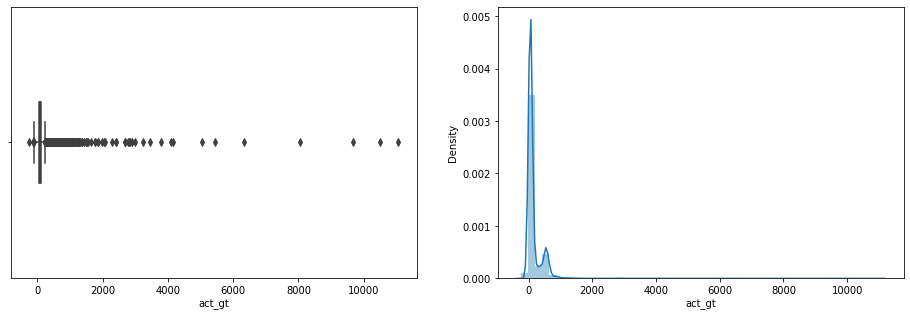

In [44]:
# Explore act_gt
print(df['act_gt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['act_gt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['act_gt'])
plt.show()

In [45]:
# How many cases have a negative actual groundtime?
df[(df['act_gt'] < 0)].shape

(897, 21)

In [46]:
# Identifying a specific aircraft wherer flt_sched_gt < 0 to analyse why there is a negative schedulded gt for a specific date
condition = df['act_gt'] < 0
sample = df[condition].sample(n=3, random_state=42)

sample

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay,routing,sched_gt,act_gt
10414,272020996,East Carmen,Matthewland,2019-06-27 09:21:00,2019-06-27 10:47:00,ECLDGX,66.0,320,94.0,90.0,B,"[Chad Rodgers_7_94_90_ca, Kyle Weaver_7_94_90_...",[],2019-06-27 08:15:00,2019-06-27 09:45:00,2019-06-27 08:15:00,2019-06-27 09:45:00,62.0,True,50.0,-9.0
1061,272214800,Fisherhaven,East Carmen,2019-06-03 18:20:00,2019-06-03 19:16:00,ECLWIX,90.0,E95,21.0,40.0,A,"[Alexandra Brown_284_21_40_ca, Jill Shaw_284_2...",[],2019-06-03 16:50:00,2019-06-03 17:50:00,2019-06-03 16:50:00,2019-06-03 17:50:00,86.0,True,40.0,-22.0
9363,271965689,East Carmen,West Jennifer,2019-06-24 17:18:00,2019-06-24 18:48:00,ECLDGX,98.0,320,49.0,60.0,B2,"[Michael Fuentes_nan_nan_nan_ca, Paul Knapp_24...","[cp, cp, ca, ca]",2019-06-24 15:40:00,2019-06-24 17:15:00,2019-06-24 15:40:00,2019-06-24 17:15:00,93.0,True,45.0,-45.0


In [47]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBKX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-10')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay,routing,sched_gt,act_gt
3508,272005020,North Gregory,East Carmen,2019-06-10 00:44:00,2019-06-10 04:05:00,ECLBKX,4.0,320,0.0,0.0,Start,"[Grant Gonzalez_nan_nan_nan_ca, Lynn Murphy_na...",[],2019-06-10 00:40:00,2019-06-10 04:30:00,NaT,NaT,-25.0,True,220.0,259.0
3622,271958621,East Carmen,Lake Lawrencechester,2019-06-10 08:24:00,2019-06-10 09:44:00,ECLBKX,14.0,320,-27.0,0.0,B2,"[Donna Greer_nan_nan_nan_ca, Lindsey Martinez_...","[ca, ca, ca, cp, cp]",2019-06-10 08:10:00,2019-06-10 09:40:00,NaT,NaT,4.0,True,70.0,68.0
3679,271958831,Lake Lawrencechester,East Carmen,2019-06-10 10:52:00,2019-06-10 11:57:00,ECLBKX,2.0,320,-16.0,70.0,A,"[Vickie Jones_nan_nan_nan_cp, Angela Stevens_n...",[ca],2019-06-10 10:50:00,2019-06-10 12:15:00,2019-06-10 10:50:00,2019-06-10 12:15:00,-18.0,True,50.0,137.0
3727,271982885,East Carmen,Davidtown,2019-06-10 14:14:00,2019-06-10 15:51:00,ECLBKX,69.0,320,8.0,50.0,A,"[James Calhoun_nan_nan_nan_ca, Brian Whitaker_...","[ca, ca, cp, cp]",2019-06-10 13:05:00,2019-06-10 15:00:00,2019-06-10 13:05:00,2019-06-10 15:00:00,51.0,True,45.0,-3.0
3796,271983095,Davidtown,East Carmen,2019-06-10 15:48:00,2019-06-10 17:36:00,ECLBKX,3.0,320,15.0,45.0,A,"[Vickie Jones_240_15_45_cp, Angela Stevens_240...",[],2019-06-10 15:45:00,2019-06-10 17:40:00,NaT,NaT,-4.0,True,105.0,125.0
3882,272210390,East Carmen,Lisamouth,2019-06-10 19:41:00,2019-06-10 21:18:00,ECLBKX,16.0,320,0.0,0.0,Start,"[Morgan Tucker_nan_nan_nan_ca, Felicia Perry_n...",[],2019-06-10 19:25:00,2019-06-10 21:05:00,NaT,NaT,13.0,True,355.0,342.0


In [48]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGMX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-11')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay,routing,sched_gt,act_gt
3978,272034640,East Allisontown,East Carmen,2019-06-11 06:35:00,2019-06-11 07:08:00,ECLGMX,0.0,DH4,0.0,0.0,Start,"[William Hooper_nan_nan_nan_cp, Janice Vasquez...",[],2019-06-11 06:35:00,2019-06-11 07:15:00,2019-06-11 06:35:00,2019-06-11 07:15:00,-7.0,True,55.0,76.0
4019,272034299,East Carmen,East Allisontown,2019-06-11 08:24:00,2019-06-11 08:56:00,ECLGMX,14.0,DH4,65.0,55.0,A,"[Henry Edwards_79_65_55_ca, William Hooper_79_...",[],2019-06-11 08:10:00,2019-06-11 08:45:00,2019-06-11 08:10:00,2019-06-11 08:45:00,11.0,True,45.0,45.0
4058,272035578,East Allisontown,East Carmen,2019-06-11 09:41:00,2019-06-11 10:18:00,ECLGMX,11.0,DH4,45.0,45.0,A,"[Henry Edwards_116_45_45_ca, Janice Vasquez_11...",[],2019-06-11 09:30:00,2019-06-11 10:10:00,2019-06-11 09:30:00,2019-06-11 10:10:00,8.0,True,45.0,67.0
4092,272019190,East Carmen,Maryland,2019-06-11 11:25:00,2019-06-11 12:49:00,ECLGMX,30.0,DH4,44.0,45.0,A,"[Henry Edwards_159_44_45_ca, William Hooper_15...",[],2019-06-11 10:55:00,2019-06-11 12:20:00,2019-06-11 10:55:00,2019-06-11 12:20:00,29.0,True,35.0,68.0
4121,272211678,Maryland,East Carmen,2019-06-11 13:57:00,2019-06-11 15:16:00,ECLGMX,62.0,DH4,25.0,35.0,A,"[Tara Cameron_193_25_35_ca, William Hooper_193...",[],2019-06-11 12:55:00,2019-06-11 14:25:00,2019-06-11 12:55:00,2019-06-11 14:25:00,51.0,True,50.0,56.0
4179,272007435,East Carmen,Keithberg,2019-06-11 16:12:00,2019-06-11 17:07:00,ECLGMX,57.0,DH4,53.0,55.0,C,"[James Harris_nan_nan_nan_ca, Shane Thompson_n...",[cp],2019-06-11 15:15:00,2019-06-11 16:05:00,2019-06-11 15:15:00,2019-06-11 16:05:00,62.0,True,40.0,49.0
4228,272205686,Keithberg,East Carmen,2019-06-11 17:56:00,2019-06-11 18:41:00,ECLGMX,71.0,DH4,24.0,40.0,A,"[James Harris_285_24_40_ca, Scott Jenkins_285_...",[],2019-06-11 16:45:00,2019-06-11 17:40:00,2019-06-11 16:45:00,2019-06-11 17:40:00,61.0,True,45.0,-5.0
4272,272000997,East Carmen,North Christopherburgh,2019-06-11 18:36:00,2019-06-11 19:31:00,ECLGMX,11.0,DH4,29.0,45.0,A,"[James Harris_336_29_45_ca, Shane Thompson_336...",[],2019-06-11 18:25:00,2019-06-11 19:25:00,2019-06-11 18:25:00,2019-06-11 19:25:00,6.0,True,590.0,601.0


In [49]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBPX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-25')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay,routing,sched_gt,act_gt
9469,272005035,North Gregory,East Carmen,2019-06-25 00:49:00,2019-06-25 04:18:00,ECLBPX,9.0,320,0.0,0.0,Start,"[Phillip Wilson_nan_nan_nan_ca, Mr. William Si...",[],2019-06-25 00:40:00,2019-06-25 04:30:00,2019-06-25 00:40:00,2019-06-25 04:30:00,-12.0,True,60.0,132.0
9532,271961722,East Carmen,Yoderburgh,2019-06-25 06:30:00,2019-06-25 07:57:00,ECLBPX,60.0,320,0.0,0.0,Start,"[Sonia Owen_nan_nan_nan_cp, Richard Love_nan_n...",[],2019-06-25 05:30:00,2019-06-25 07:05:00,2019-06-25 05:30:00,2019-06-25 07:05:00,52.0,True,45.0,4.0
9575,271961932,Yoderburgh,East Carmen,2019-06-25 08:01:00,2019-06-25 09:23:00,ECLBPX,11.0,320,57.0,45.0,A,"[Erin Robinson_59_57_45_ca, Jennifer Evans_59_...",[],2019-06-25 07:50:00,2019-06-25 09:25:00,2019-06-25 07:50:00,2019-06-25 09:25:00,-2.0,True,70.0,133.0
9645,272023152,East Carmen,Lake Williammouth,2019-06-25 11:36:00,2019-06-25 13:16:00,ECLBPX,61.0,320,65.0,70.0,A,"[Bonnie Harrell_nan_nan_nan_ca, Sonia Owen_112...","[cp, cp]",2019-06-25 10:35:00,2019-06-25 12:20:00,2019-06-25 10:35:00,2019-06-25 12:20:00,56.0,True,40.0,-14.0
9702,272023359,Lake Williammouth,East Carmen,2019-06-25 13:02:00,2019-06-25 14:43:00,ECLBPX,2.0,320,35.0,40.0,A,"[Sharon Davidson_174_35_40_ca, Bonnie Harrell_...",[],2019-06-25 13:00:00,2019-06-25 14:55:00,2019-06-25 13:00:00,2019-06-25 14:55:00,-12.0,True,45.0,139.0
9780,271960548,East Carmen,Yoderburgh,2019-06-25 17:02:00,2019-06-25 18:29:00,ECLBPX,82.0,320,43.0,70.0,C,"[Jose Harrington_nan_nan_nan_cp, Brandy Larsen...","[ca, ca, ca]",2019-06-25 15:40:00,2019-06-25 17:20:00,2019-06-25 15:40:00,2019-06-25 17:20:00,69.0,True,45.0,-23.0
9828,271960758,Yoderburgh,East Carmen,2019-06-25 18:06:00,2019-06-25 19:36:00,ECLBPX,1.0,320,52.0,45.0,A,"[Tina Thornton_305_52_45_ca, Robin Mclaughlin_...",[],2019-06-25 18:05:00,2019-06-25 19:40:00,2019-06-25 18:05:00,2019-06-25 19:40:00,-4.0,True,75.0,97.0
9880,272177534,East Carmen,East Elizabethside,2019-06-25 21:13:00,2019-06-25 22:55:00,ECLBPX,18.0,320,0.0,0.0,Start,"[Daniel Williams_nan_nan_nan_ca, Carla Zimmerm...",[],2019-06-25 20:55:00,2019-06-25 22:55:00,2019-06-25 20:55:00,2019-06-25 22:55:00,0.0,True,195.0,260.0


## Scheduled Departure

In [50]:
# Check mismatches in sched dep between flight data and ground data
sched_dep_mismatch = df[df.gnd_sched_dep.notna() & (df['flt_sched_dep'].astype(str) != df['gnd_sched_dep'].astype(str))]
sched_dep_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,block_delay,routing,sched_gt,act_gt


In [51]:
# Drop gnd_sched_dep as all information is already contained in flt_sched_dep; create new feature for day of the week and hour of the day
df = df.drop(columns='gnd_sched_dep')

In [52]:
# Check mismatches in sched dep  between flight data and ground data
sched_arr_mismatch = df[df.gnd_sched_arr.notna() & (df['flt_sched_arr'].astype(str) != df['gnd_sched_arr'].astype(str))]
sched_arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_sched_arr,block_delay,routing,sched_gt,act_gt


In [53]:
# Drop gnd_sched_arr as all information is already contained in flt_sched_arr; create new feature for hour of the day
df = df.drop(columns='gnd_sched_arr')

In [54]:
print(df.shape)
df.head()

(11703, 19)


,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,block_delay,routing,sched_gt,act_gt
9,272024970,New Jessica,East Carmen,2019-06-01 03:50:00,2019-06-01 07:01:00,ECLBAX,25.0,320,0.0,0.0,Start,"[Sean Weeks_nan_nan_nan_ca, Tony Lloyd_nan_nan...",[],2019-06-01 03:25:00,2019-06-01 06:45:00,16.0,True,95.0,94.0
117,272022230,East Carmen,South Nathaniel,2019-06-01 08:35:00,2019-06-01 10:41:00,ECLBAX,15.0,320,60.0,60.0,B,"[Toni Rodriguez_48_60_60_ca, Rachel Smith_48_6...",[],2019-06-01 08:20:00,2019-06-01 10:35:00,6.0,True,75.0,120.0
194,272212848,South Nathaniel,East Carmen,2019-06-01 12:41:00,2019-06-01 14:52:00,ECLBAX,51.0,320,68.0,75.0,A,"[Toni Rodriguez_127_68_75_ca, Rachel Smith_127...",[],2019-06-01 11:50:00,2019-06-01 14:15:00,37.0,True,80.0,86.0
268,271997824,East Carmen,Joneshaven,2019-06-01 16:18:00,2019-06-01 17:32:00,ECLBAX,43.0,320,64.0,70.0,B2,"[Tyler Morris_224_64_70_ca, Sergio Cummings_22...","[ca, cp, ca, ca, ca]",2019-06-01 15:35:00,2019-06-01 17:00:00,32.0,True,50.0,32.0
302,271998033,Joneshaven,East Carmen,2019-06-01 18:04:00,2019-06-01 19:14:00,ECLBAX,14.0,320,42.0,50.0,A,"[Sergio Cummings_279_42_50_cp, Jackie Black_27...",[],2019-06-01 17:50:00,2019-06-01 19:10:00,4.0,True,700.0,716.0


In [55]:
df.to_csv('../data/interim/explored.csv')
df.to_pickle('../data/interim/explored.pkl')